In [26]:
import scanpy as sc
import numpy as np
import pandas as pd

In [3]:
adata1=sc.read_csv(r"/home/jacky/huaitaodata/scRNA/rna_counts.tsv.gz",delimiter="\t",first_column_names=True)
adata2=sc.read_csv(r"/home/jacky/huaitaodata/scRNA/Early plates, HCFr_counts_210824.tsv",delimiter="\t",first_column_names=True)

In [4]:
adata1=adata1.transpose()
adata2=adata2.transpose()


#concatenate two datasets
adata3=sc.concat([adata1,adata2],axis=0)



In [5]:
adata1.obs["batch"]="batch1"
adata2.obs["batch"]="batch2"
adata3=sc.concat([adata1,adata2],axis=0)


/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


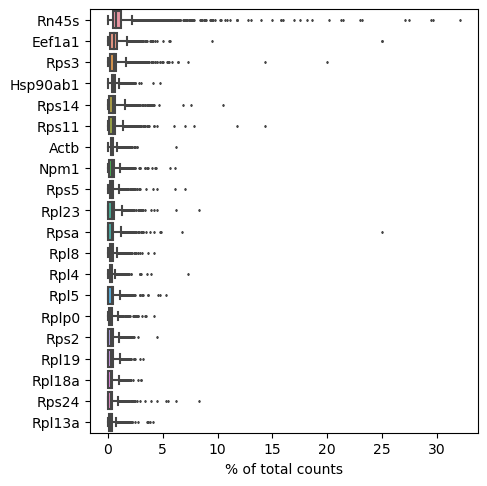

In [6]:
#remove unwanted row

adata3=adata3[:,~adata3.var_names.str.contains('__')]


sc.pl.highest_expr_genes(adata3, n_top=20, )

In [8]:
#save it as csv file
adata3.write_csvs(r"/home/jacky/huaitaodata/scRNA/adata3.csv")


In [10]:
def mergeprocess(a,b):
    import scanpy as sc
    import numpy as np
    import pandas as pd

    #in this example we have two batch, batch1 and batch2, we want to merge them together
    adata1=a
    adata2=b
    adata1=adata1.transpose()
    adata2=adata2.transpose()


    #concatenate two datasets
    adata3=sc.concat([adata1,adata2],axis=0)


    adata1.obs["batch"]="batch1"
    adata2.obs["batch"]="batch2"
    adata3=sc.concat([adata1,adata2],axis=0)


    #remove unwanted row

    adata3=adata3[:,~adata3.var_names.str.contains('__')]


    sc.pl.highest_expr_genes(adata3, n_top=20, )


    #use it as input for fullprocess
    adata3.write_h5ad(r"/home/jacky/huaitaodata/scRNA/mergeprocess.h5ad")

    print("mergeprocess save successfully in /home/jacky/huaitaodata/scRNA/mergeprocess.h5ad")




def fullprocess(a):
    import scanpy as sc
    import numpy as np
    import pandas as pd


    #input is the output of mergeprocess
    
    a=sc.read_h5ad(a)
    a=a[:,~a.var_names.str.contains('__')]
    a=a[~a.obs_names.str[:8].str.contains('HCF01102')]
    a.obs['plate']=a.obs_names.str[4:8]
    #create a new column in adata.obs called time, 0h includes 0101 and 0601 in abata.obs_names,48h that include 0701 in adata.obs_names, 72h that include 0201 and 0801 in adata.obs_names,96h that include 0301,0302 and 0901 in adata.obs_names, 120h include the rest in adata.obs_names
    a.obs['time'] = 'time'
    a.obs.loc[a.obs_names.str.contains('0101|0601'), 'time'] = '0h'
    a.obs.loc[a.obs_names.str.contains('0701'), 'time'] = '48h'
    a.obs.loc[a.obs_names.str.contains('0201|0801'), 'time'] = '72h'
    a.obs.loc[a.obs_names.str.contains('0301|0302|0901'), 'time'] = '96h'

#whatever is left go to 120h
    a.obs.loc[a.obs['time'] == 'time', 'time'] = '120h'

    a.obs


    adata=a


    sc.pp.filter_cells(adata, min_genes=3000)
    sc.pp.filter_genes(adata, min_cells=3)
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
    sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

    sc.pp.normalize_total(adata, target_sum=1e4)

    sc.pp.log1p(adata)

    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

    sc.pl.highly_variable_genes(adata)

    adata = adata[:, adata.var.highly_variable]

    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

    sc.pp.scale(adata, max_value=10)

    sc.pp.combat(adata, key='batch')

    sc.tl.pca(adata, svd_solver='arpack')

    sc.pl.pca(adata, color=['time'])

    sc.pp.neighbors(adata, n_neighbors=6, n_pcs=20)
    sc.tl.draw_graph(adata)


    sc.tl.louvain(adata, resolution=0.3)

    sc.tl.paga(adata, groups='louvain')

    sc.pl.paga(adata, color=['time', 'louvain'])


    #umap plot
    sc.tl.umap(adata)
    sc.pl.umap(adata, color=['time', 'louvain','plate'])


    adata.write_h5ad(r"/home/jacky/huaitaodata/scRNA/fullprocess.h5ad")

    print("fullprocess save successfully in /home/jacky/huaitaodata/scRNA/fullprocess.h5ad")
    

/tmp/ipykernel_56274/4246482647.py:9: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  a.obs['plate']=a.obs_names.str[4:8]


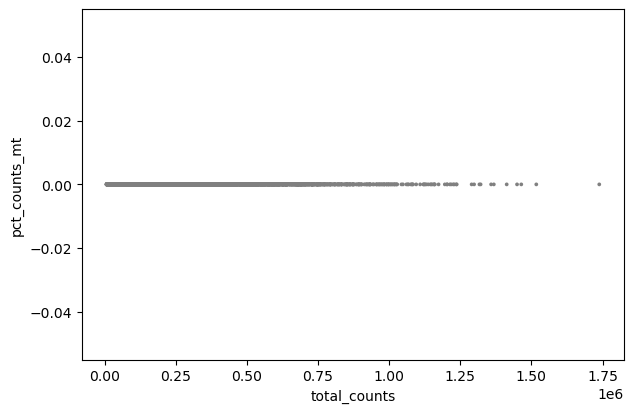

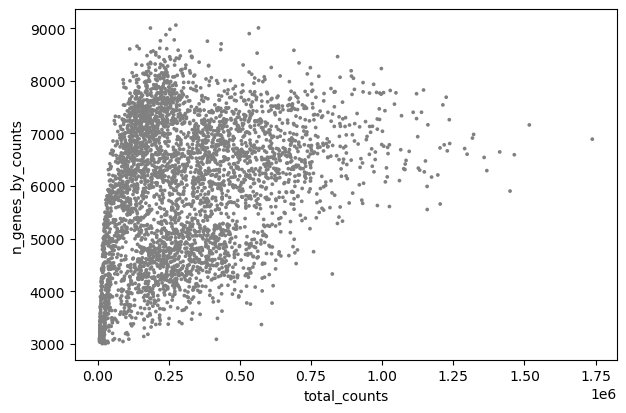

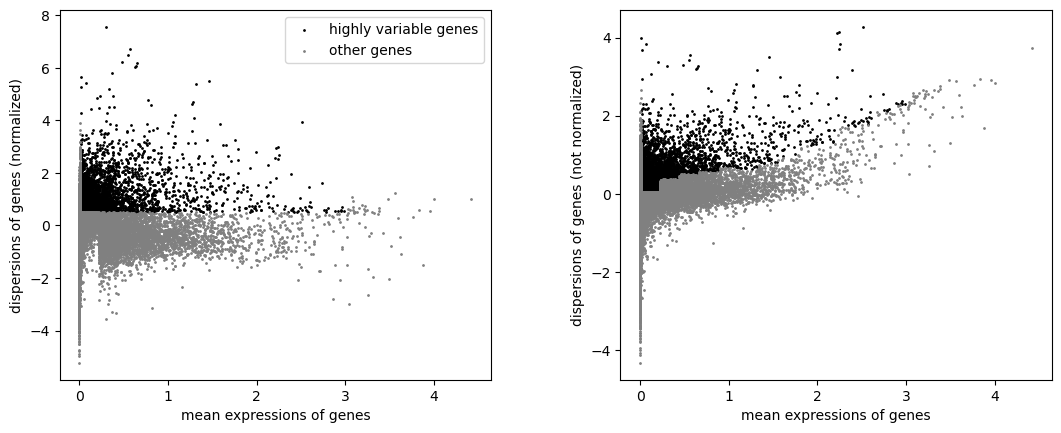

/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


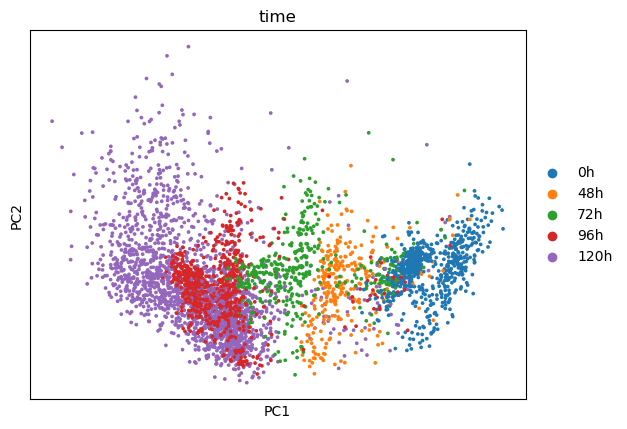

2023-06-13 10:45:11.705726: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 10:45:11.739830: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-13 10:45:11.740339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 10:45:12.303922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


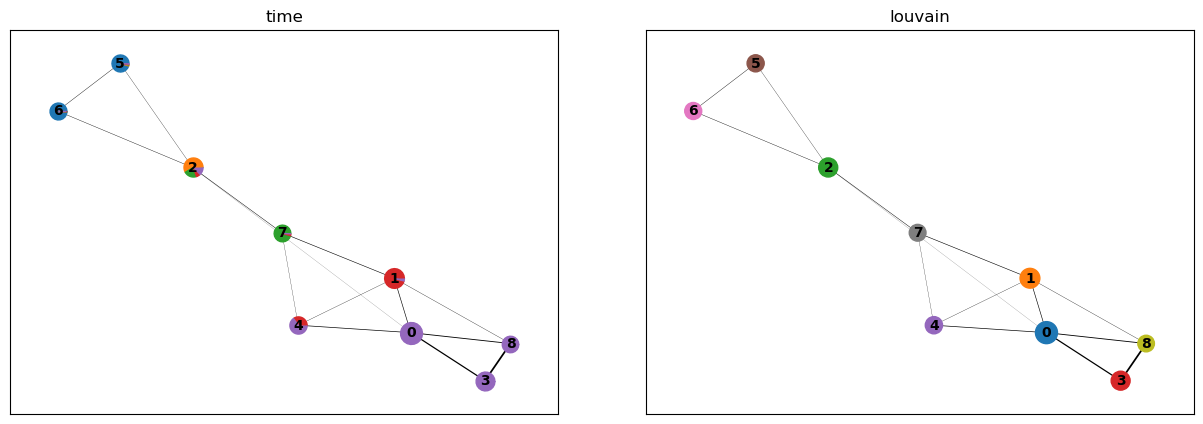

/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


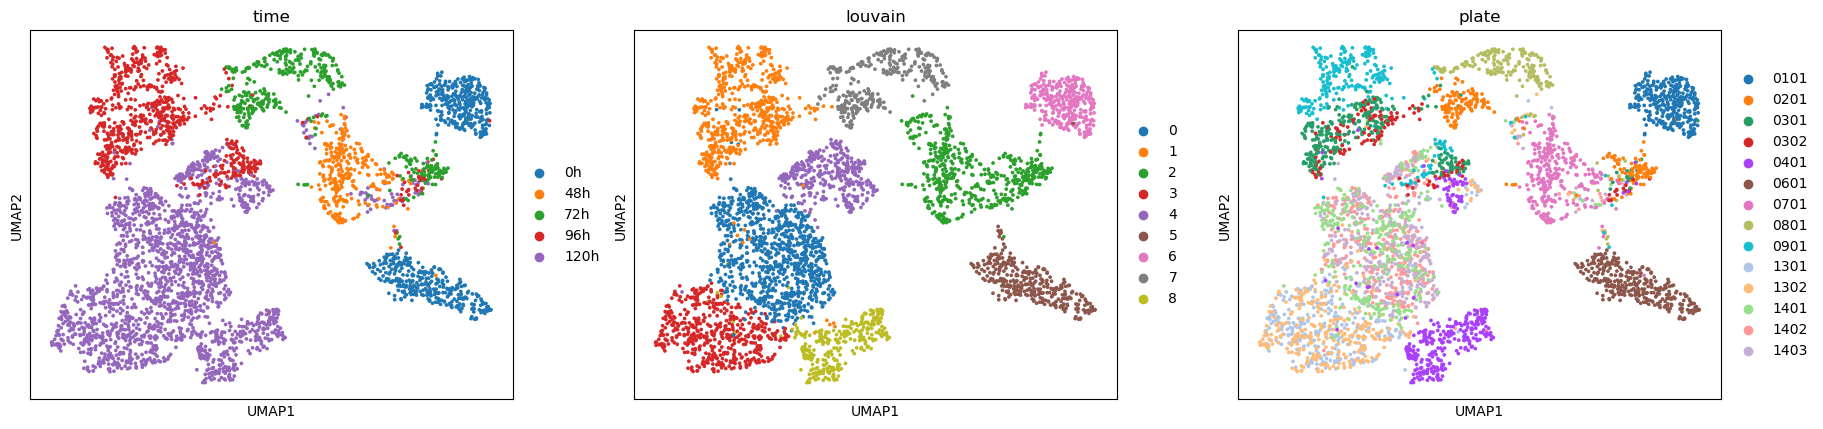

fullprocess save successfully in /home/jacky/huaitaodata/scRNA/fullprocess.h5ad


In [9]:
fullprocess(adata3)

# cell annotate #

In [2]:
import scanpy as sc

In [3]:
fullprocess=sc.read_h5ad("/home/jacky/huaitaodata/scRNA/fullprocess.h5ad")

In [4]:
fullprocess

AnnData object with n_obs × n_vars = 4114 × 4128
    obs: 'batch', 'plate', 'time', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'draw_graph', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'plate_colors', 'time_colors', 'umap'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

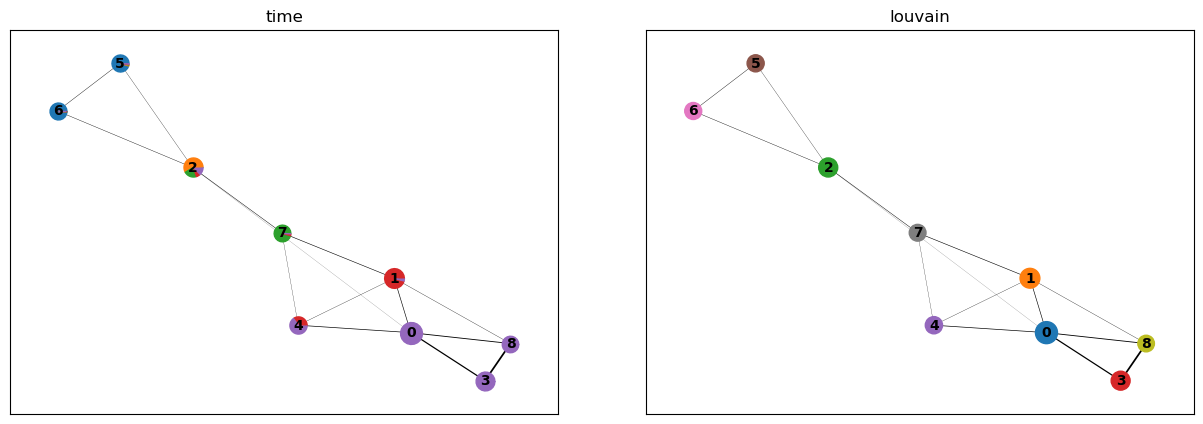

In [6]:
sc.pl.paga(fullprocess, color=['time', 'louvain'])

/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


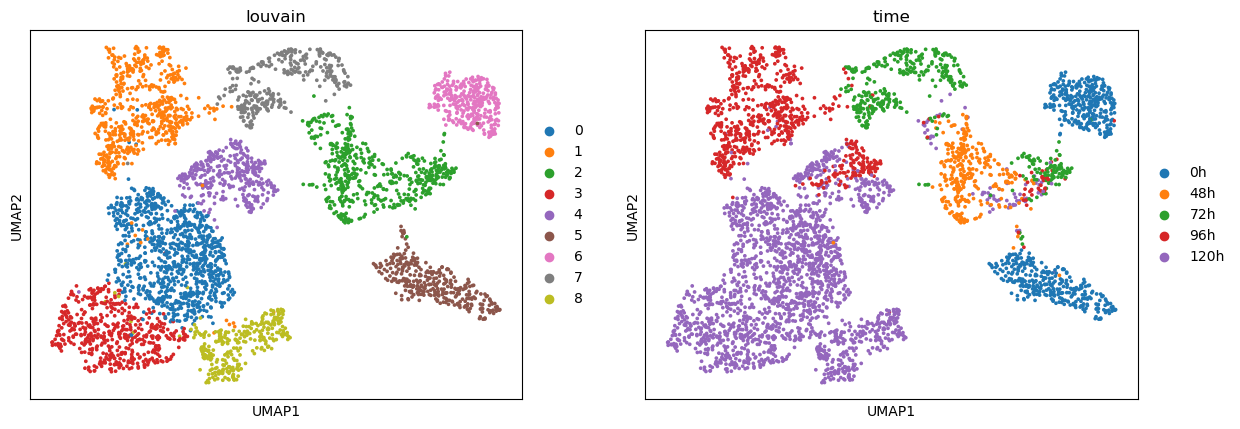

In [12]:
sc.pl.umap(fullprocess,color=['louvain','time'])

In [8]:
sc.tl.diffmap(fullprocess)

In [48]:
fullprocess.uns['iroot']=0

In [49]:
sc.tl.dpt(fullprocess, n_branchings=3, n_dcs=15)


/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jacky/miniconda2/envs/jacky/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


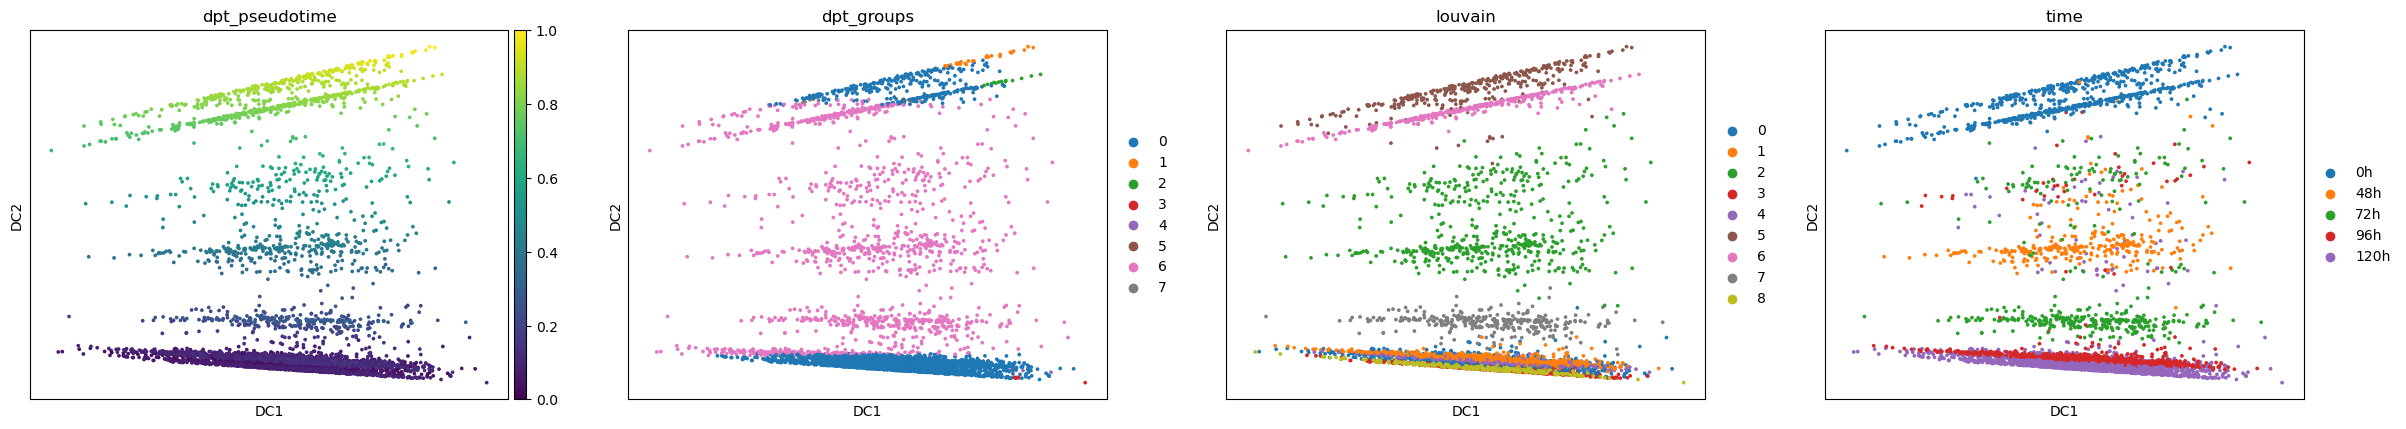

In [51]:
sc.pl.diffmap(fullprocess, color=['dpt_pseudotime', 'dpt_groups','louvain','time'])


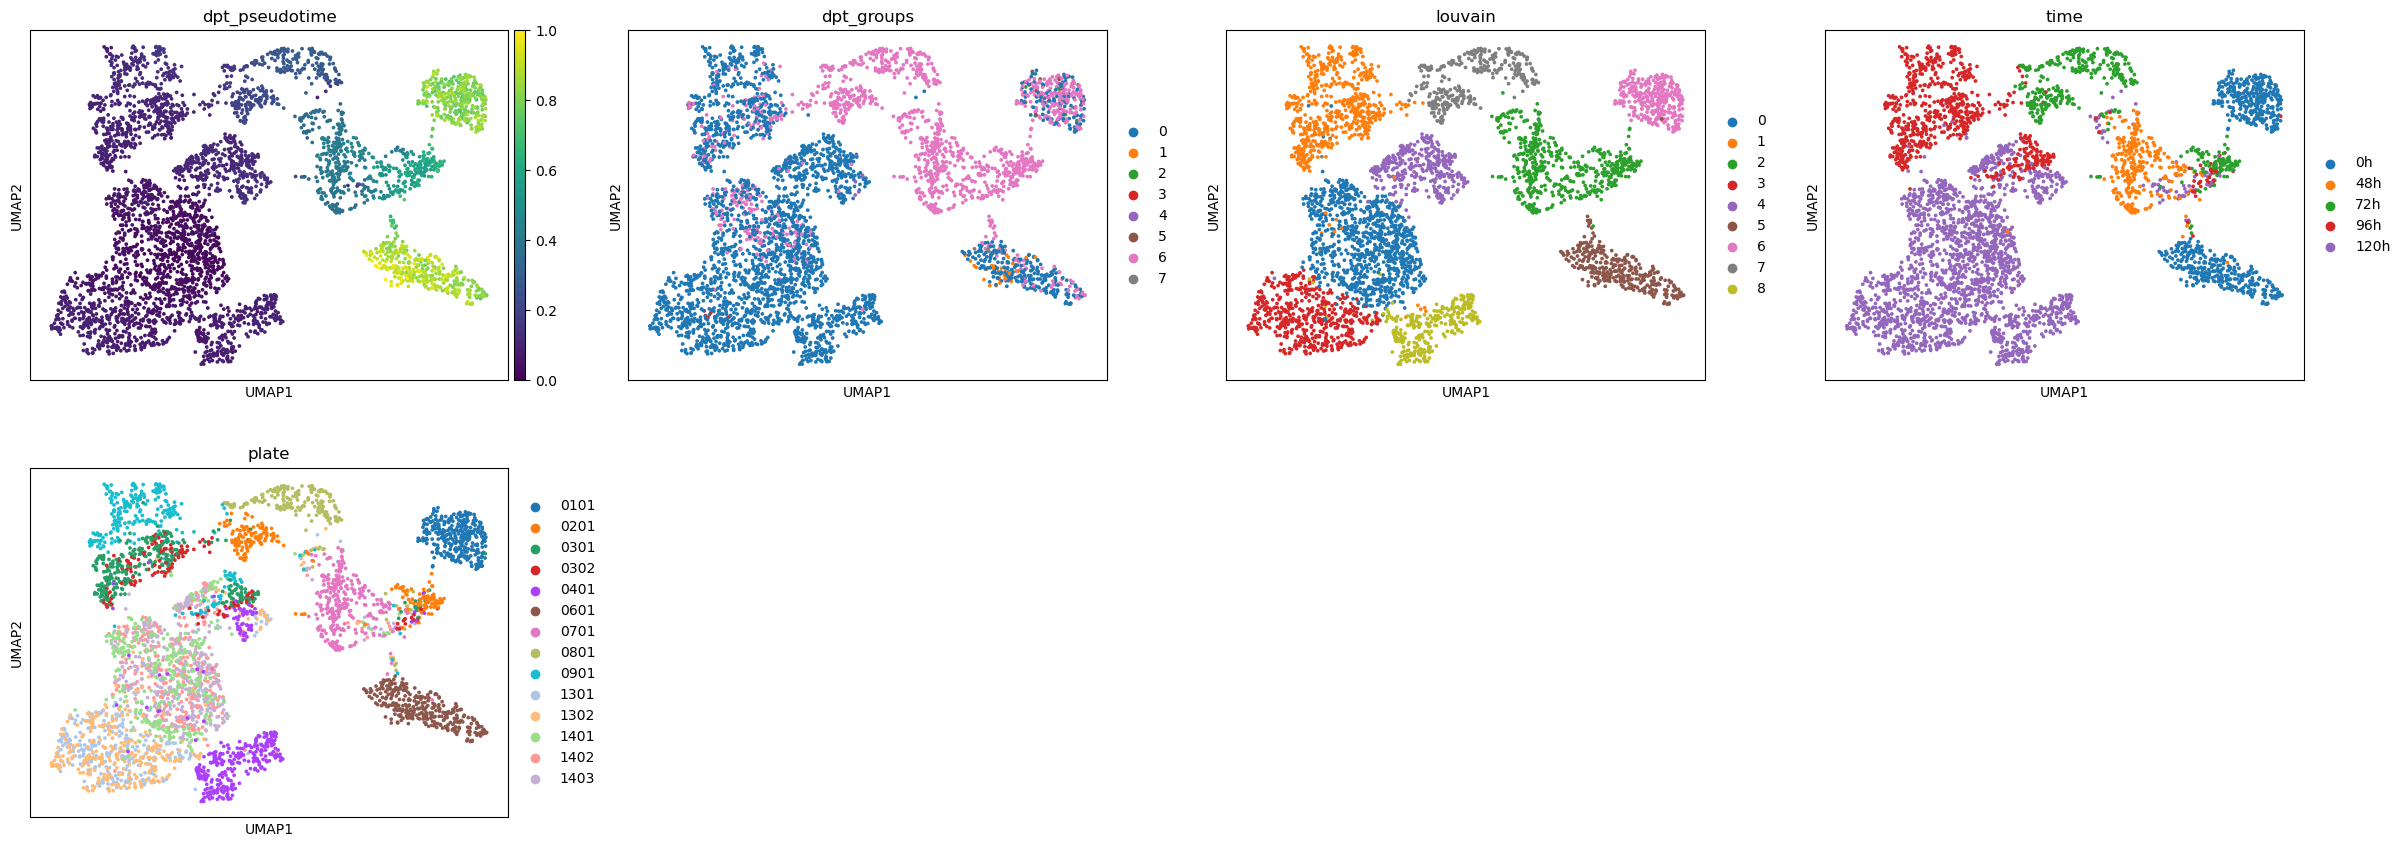

In [82]:
sc.pl.umap(fullprocess,color=['dpt_pseudotime', 'dpt_groups','louvain','time','plate'])

In [87]:
fullprocess

AnnData object with n_obs × n_vars = 4114 × 4128
    obs: 'batch', 'plate', 'time', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'louvain', 'dpt_pseudotime', 'dpt_groups', 'dpt_order', 'dpt_order_indices'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'draw_graph', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'pca', 'plate_colors', 'time_colors', 'umap', 'diffmap_evals', 'iroot', 'dpt_changepoints', 'dpt_grouptips', 'dpt_groups_colors'
    obsm: 'X_draw_graph_fr', 'X_pca', 'X_umap', 'X_diffmap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

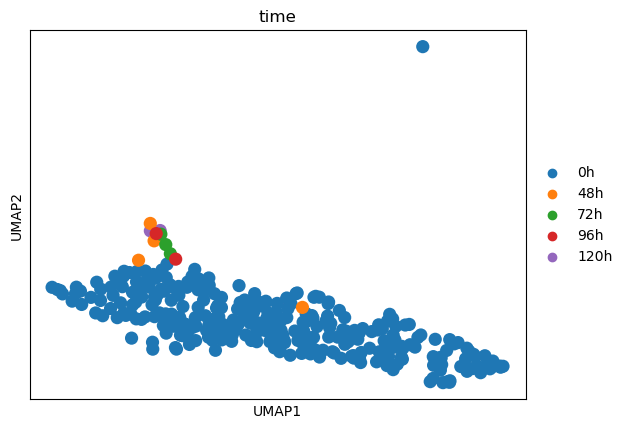

In [90]:
cluster5=fullprocess[fullprocess.obs['louvain']=='5']
sc.pl.umap(cluster5, color='time',)


<Axes: title={'center': 'Plate 0601 Cells'}, xlabel='UMAP1', ylabel='UMAP2'>

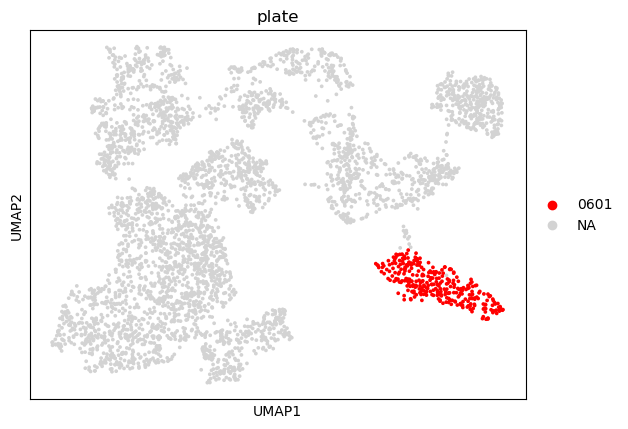

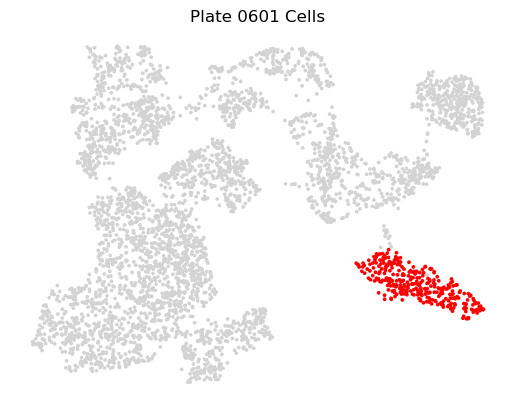

In [88]:
sc.pl.umap(fullprocess, color='plate', groups=['0601'], palette=['red'], show=False)
sc.pl.umap(fullprocess, color='plate', groups=['0601'], use_raw=False, title="Plate 0601 Cells", 
           frameon=False, legend_loc=None, show=False)

In [92]:
remove0 = ~((fullprocess.obs['louvain'] == '5') & (fullprocess.obs['time'] == '0h'))
filtered_data = fullprocess[remove0]


In [112]:
filtered_data.write_h5ad('/home/jacky/huaitaodata/scRNA/filtered_data.h5ad')

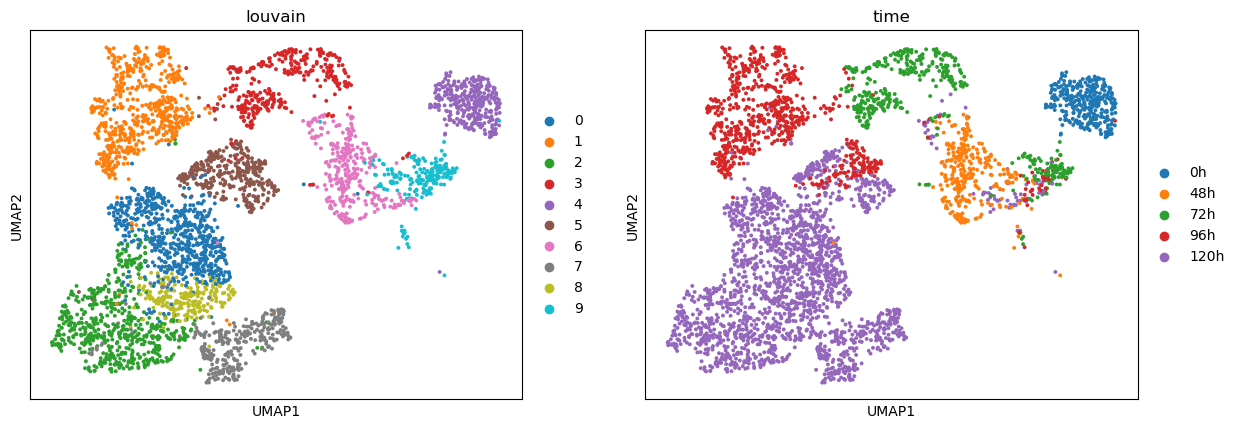

In [102]:
import scanpy as sc

# 1. 计算邻居
sc.pp.neighbors(filtered_data, n_neighbors=10, use_rep='X_pca')  # 使用 PCA 表示，你可以根据需要更改

# 2. 使用 Louvain 聚类
sc.tl.leiden(filtered_data, resolution=1.0)  # 可以调整 resolution 参数以获得更细或更粗的聚类

# 可视化聚类结果
sc.pl.umap(filtered_data, color=['louvain','time'])


In [104]:
import numpy as np
root_cells = filtered_data.obs_names[filtered_data.obs['louvain'] == '4'][0]
filtered_data.uns['iroot'] = np.where(filtered_data.obs_names == root_cells)[0][0]


In [105]:
sc.tl.dpt(filtered_data)


In [106]:
sc.tl.paga(filtered_data, groups='louvain')


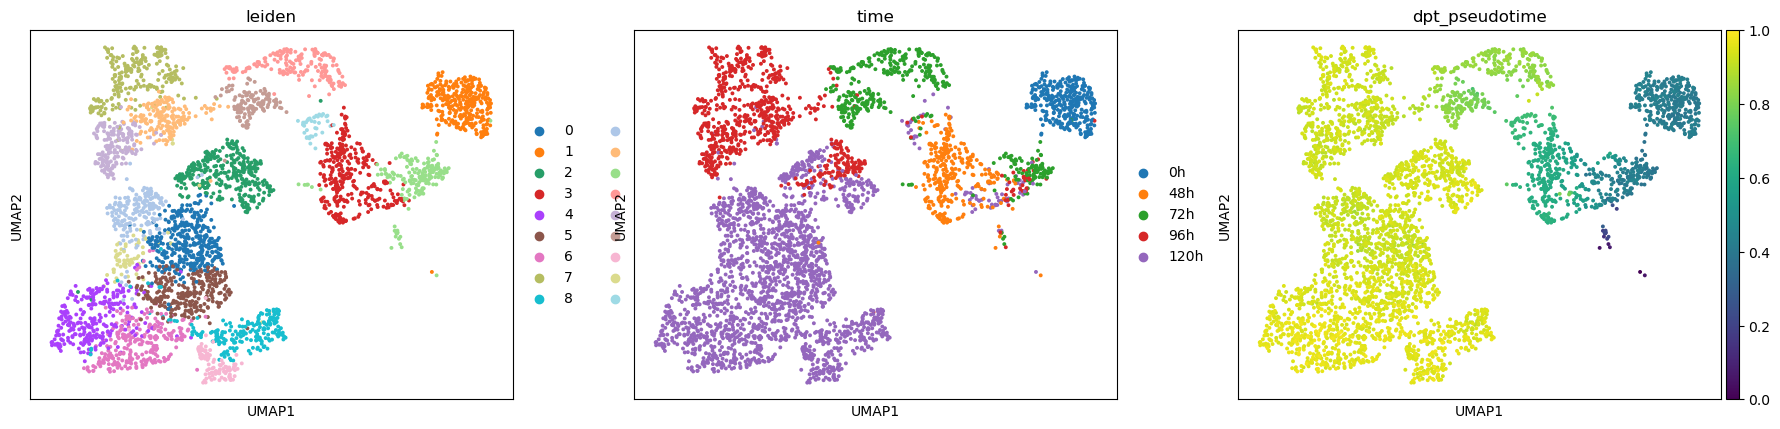

In [110]:
sc.pl.umap(filtered_data, color=['leiden','time','dpt_pseudotime'])

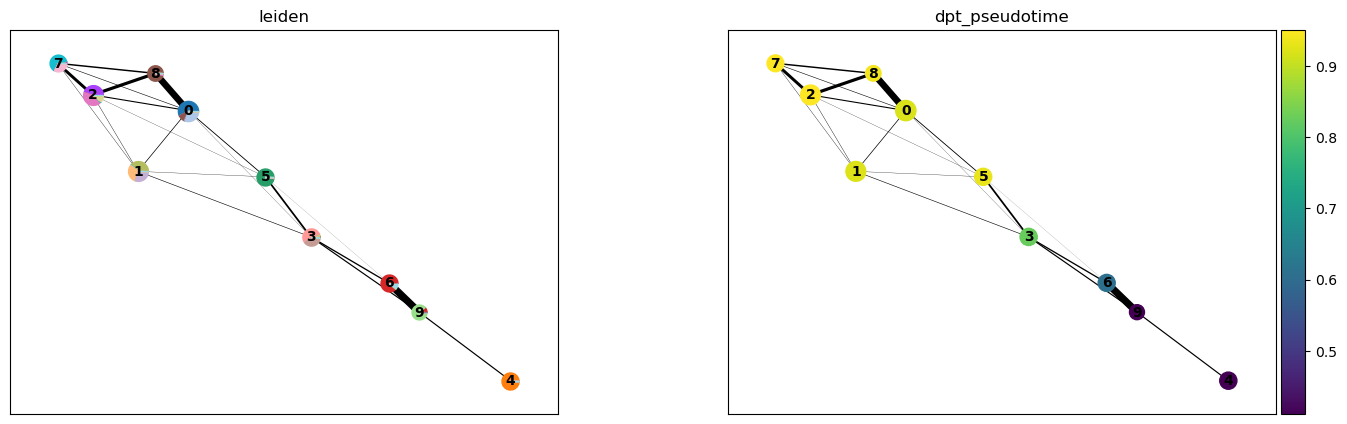

In [109]:
sc.pl.paga(filtered_data, color=['leiden', 'dpt_pseudotime'])


In [115]:
print("one")

one
